# consistency checks for lpm annihilation simulation
Timothy Tyree<br>
3.29.2023

In [1]:
from lib.my_initialization import *

/Users/timothytyree/opt/miniconda3/envs/pyenv/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
import subprocess

In [3]:
plt.plot([1]*4)
plt.close()
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mpl.rcParams.update(matplotlib.rcParamsDefault) #reset matplotlib

# define module

# consistency check for return_CollTime.c

In [4]:
# cfolder=f"{nb_dir}/../c/attractive"
cfolder='/Users/timothytyree/Documents/GitHub/bgmc/c/attractive'
# cfolder='/home/timothytyree/Documents/GitHub/bgmc/c/attractive'
os.chdir(cfolder)

In [5]:
!pwd

/Users/timothytyree/Documents/GitHub/bgmc/c/attractive


In [6]:
#compile the executable
os.system('./gcc.sh')

0

In [7]:
# # input_string = f"0.155 0.4158 5 300 9.3154 1 0.0001 0.0001 4 10000 1 0 0 0 0 1 2"
# # input_string = f"0.155 0.4158 5 300 9.3154 1 0.0001 0.0001 4 2 1 0 0 0 0 1 2"
# func_path = f"{cfolder}/return_CollTime.x"
# f"{func_path} {input_string}"
# # os.system(f"{func_path} {input_string}")
# # os.system(f"{func_path} {input_string} | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'")
# os.system(f"{func_path} <<< {input_string} | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'")
# # os.system(f"/return_CollTime.x < 1-control.input | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'")

In [8]:
# N0_lst=list(range(2,100,4))
# N0_lst=list(range(2,100,8))
N0_lst=list(range(2,102,2))
# N0_lst

In [33]:
niter=1000
dt=1e-4
L=5
# L=10 
D=0.42#0.4158
alinear=9.3#9.3154
neighbor=0
r=0.155
kappa=300
# seed=1
seed=0
task_lst=[]
# for N0 in range(2,100,2):
for N0 in N0_lst:
    input_string = f"{r} {D} {L} {kappa} {alinear} 1 {dt} {dt} {N0} {niter} {seed} 0 0 0 0 {neighbor} 2"
    call_string = f"/Users/timothytyree/Documents/GitHub/bgmc/c/attractive/return_CollTime.x <<< '{input_string}'"
    call_string+= " | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'"
    task_lst.append(call_string)
print(f"{len(task_lst)=}")
call_string

"/Users/timothytyree/Documents/GitHub/bgmc/c/attractive/return_CollTime.x <<< '0.155 0.42 5 300 9.3 1 0.0001 0.0001 100 1000 0 0 0 0 0 0 2'"

In [10]:
def routine(call_string):
    return eval(subprocess.check_output(call_string, shell=True))

In [11]:
retval=[]
for call_string in task_lst:
    retval.append(routine(call_string))
len(retval)

50

In [288]:
# retval

In [13]:
# #run daskbag
# printing=True
# max_num_jobs=os.cpu_count()-1
# npartitions=np.min((len(task_lst),max_num_jobs))
# if printing:
#     print(f"running {len(task_lst)} tasks over {npartitions} cpu cores...")
# retval=eval_routine_daskbag(routine,task_lst,npartitions,printing=printing)
# if printing:
#     print(f"tasks complete!")

In [14]:
L

5

In [15]:
A=L**2
q_lst=[]
w_lst=[]
Tavg_lst=[]
for N0,Tavg in zip(N0_lst,retval):
    rate = 1/Tavg
    w = rate/A
#     q = (N0+2)/A
    q = N0/A
    #record
    w_lst.append(w)
    q_lst.append(q)
    Tavg_lst.append(Tavg)

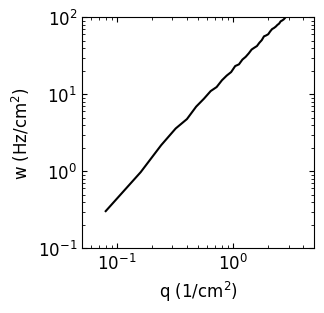

In [16]:
fig,ax=plt.subplots(figsize=(3,3))
fontsize=12
plt.plot(q_lst,w_lst,color='k')
plt.xscale('log')
plt.yscale('log')
plt.axis([5e-2,5e0,0.1,100])
plt.tick_params(top=True, right=True,direction='in',which='both')
format_plot(xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)
plt.show()

In [17]:
beep(4)

-n 
-n 
-n 
-n 


0

In [18]:
df_rates = pd.DataFrame(dict(
    N0=N0_lst,
    Tavg=Tavg_lst,
    q=q_lst,
    w=w_lst))
rate_dir = f"{nb_dir}/data/control_data/lpm_table1_lr_L_5.csv"
df_rates.to_csv(rate_dir,index=False)
rate_dir

'/Users/timothytyree/Documents/GitHub/bgmc/python/data/control_data/lpm_table1_lr_L_5.csv'

In [19]:
kwargs = dict(data_fk_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_fk_tt.csv',
              data_lr_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_lr_tt.csv',
             min_num_particles=9)

In [20]:
dict_wjr = recall_death_rates_vidmar_rappel(**kwargs)
fk=dict_wjr['fk']
lr=dict_wjr['lr']
print(f"annihilation rate density powerlaw fits:")
dict_fit_death_fk = print_fit_power_law(x=fk['q'].values,y=fk['w'].values)
dict_fit_death_lr = print_fit_power_law(x=lr['q'].values,y=lr['w'].values)

annihilation rate density powerlaw fits:
m = 1.877234 +/- 0.024488
M = 5.572316 +/- 0.299027 Hz/cm^2; B=2.496963 +/- 0.039522
RMSE=0.1386 Hz/cm^2; R^2=0.9969; MPE=6.9910%; N=73
m = 1.637556 +/- 0.016847
M = 16.735599 +/- 0.829136 Hz/cm^2; B=5.587740 +/- 0.065801
RMSE=0.1340 Hz/cm^2; R^2=0.9973; MPE=7.2488%; N=100


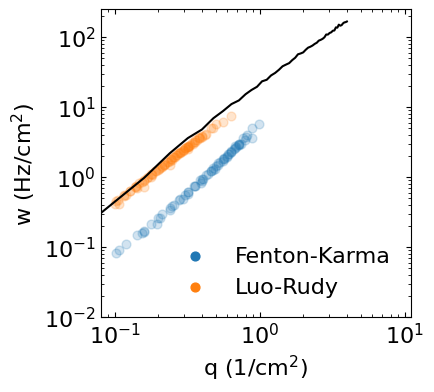

In [21]:
use_filterby_minN=True
minN=10
# minN=8
# figsize = (6, 4)  #(5,4)
figsize = (4, 4)  #(5,4)
fontsize=16

# x1lim=[0.008, 11]
x1lim=[0.08, 11]
x2lim=[0.01, 250]


fig, ax = plt.subplots(figsize=figsize)
ax = plot_death_rates_loglog_full(fk,lr,ax=ax,fontsize=fontsize,x1lim=x1lim, x2lim=x2lim)

ax.plot(q_lst,w_lst,color='k')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.axis([5e-2,5e0,0.1,100])
ax.tick_params(top=True, right=True,direction='in',which='both')
format_plot(ax=ax,xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)
plt.show()

In [22]:
#13 minutes with 1000 perturbations and cross-validation of training per call to routine
# npartitions = np.max((1,os.cpu_count()-1))
# npartitions = np.min((npartitions,len(task_lst)))
# print(f"evaluating tasks (estimated run time 80 minutes)...")
# print(f"evaluating {len(task_lst)} calls to gener_tbins_fast over {npartitions} cpu cores...")

In [23]:
# with Pool(processes=(os.cpu_count() - 1)) as pool:
#     retval = list(pool.map(routine, task_lst))

In [24]:
# pd.read_csv ( '/Users/timothytyree/Documents/GitHub/bgmc/python/data/annihil_fitted_values.34.33.csv' )


In [25]:
# 10.147 - 2*0.4158

In [26]:
# task_str=f"{r:.5f} {D:.5f} {L} {kappa:.5f} {varkappa:.5f} {x0} {Dt} {dt} {Nmax} {niter} {reflect} {set_second} {no_repulsion} {no_attraction} {neighbor} {force_code}"


In [27]:
#DONE: replot Fig. 2B
#DONE: print its inputs
#DONE: use the function to generate its xy values
#DONE: overlay the xy values

# TODO: consistency check of return_CollTimes.c 
then, <br>
- TODO: call return_CollTimes.c
- TODO: check that I am able to reproduce one of WJ's curves
- TODO: use ^this to update xrun.sh

In [333]:
# cfolder=f"{nb_dir}/../c/attractive"
cfolder='/Users/timothytyree/Documents/GitHub/bgmc/c/attractive_c'
# cfolder='/home/timothytyree/Documents/GitHub/bgmc/c/attractive_c'
os.chdir(cfolder)
#compile the executable
os.system('./gcc.sh')
# !pwd

0

In [340]:
niter=1000
# niter=10
dt=1e-4
# dt=1e-5
L=5
# L=10 
D=0.42#0.4158
alinear=9.3#9.3154
neighbor=0
r=0.155
kappa=300
# seed=1
# seed=0  #<<< what wj was using
seed=42
# Nmax=50
# Nmax=30
# Nmax=15
Nmax=100
# Nmax=102
# Nmax=1000
input_string = f"{r} {D} {L} {kappa} {alinear} 1 {dt} {dt} {Nmax} {niter} {seed} 0 0 0 0 {neighbor} 2"
call_string = f"{cfolder}/return_CollTimes.x <<< '{input_string}'"
call_string

"/Users/timothytyree/Documents/GitHub/bgmc/c/attractive_c/return_CollTimes.x <<< '0.155 0.42 5 300 9.3 1 0.0001 0.0001 100 1000 42 0 0 0 0 0 2'"

In [341]:
os.system(call_string)
# 52.2s

Enter the reaction range (cm): r=0.155
Enter the diffusion coefficient (cm^2/s): D=0.42
Enter the domain width/height (cm): L=5
Enter the reaction rate (Hz): kappa=300
Enter the spring rate (Hz): varkappa=9.3
Enter the unpreferred distance (cm): x0=1
Enter the timestep of motion: Dt=0.0001
Enter the timestep of reaction: dt=0.0001
Enter the number of tips to observe: N=100
Enter the number of trials: niter=1000
Enter the randomization seed: seed=42
Use reflecting boundary conditions? (Enter 1/0): reflect=0
Set second particle within reaction range of first? (Enter 1/0): set_second=0
Do not allow repulsive forces? (Enter 1/0): no_repulsion=0
Do not allow attractive forces? (Enter 1/0): no_attraction=0
Only allow nearest neighbor forces? (Enter 1/0): neighbor=0
Which force model should be used?
(Enter 1:spring, 2:QED2, 3:QED3, 4:QED2 + const. repulsion, 5:QED3 + const. repulsion, else:no force): force_code=2
the repeatable inputs are:
0.155 0.42 5 300 9.3 1 0.0001 0.0001 100 1000 42 0 0 

0

In [342]:
# len([0.002000,np.nan,np.nan,0.000196,0.000175, 0.000166,0.000164,0.000159,0.000140,0.000137,0.000130,0.000129,0.000115,0.000120,0.000123,0.000112,0.000109,0.000111,0.000110,0.000103,0.000102,0.000103,0.000094,0.000098,0.000098,0.000096,0.000096,0.000096,0.000097,0.000098,0.000091,0.000090,0.000097,0.000092,0.000095,0.000095,0.000092,0.000091,0.000091,0.000097,0.000091,0.000090,0.000094,0.000090,0.000088,0.000092,0.000093,0.000089,0.000095,0.000094,0.000092,0.000097,0.000094,0.0])
# len([    100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,
#     ])
# CLAIM: i have particles reacting multiple times
#  DONE: make sure particles that are removed are not considered for any later reactions.
beep(3)

-n 
-n 
-n 


0

In [322]:

# 1000,0,0,0,5,169,807,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,
# 1000,0,0,0,2,98,535,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,

In [343]:
# 100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,
# 0.000000,0.001200,0.012500,0.021200,0.017100,0.016200,0.016700,0.014900,0.015100,0.014900,0.014500,0.013300,0.012700,0.012700,0.012800,0.013500,0.012500,0.013200,0.013000,0.011300,0.011800,0.012100,0.011800,0.012700,0.012200,0.012000,0.011700,0.011700,0.013500,0.011200,0.013300,0.013100,0.013500,0.014000,0.014600,0.014100,0.014900,0.014600,0.017400,0.019200,0.019100,0.020700,0.026300,0.031200,0.039100,0.055900,0.096300,0.238200,
L=5
dout = pd.DataFrame({'N':[
    #shifted
100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,
#     100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,
#     100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,
    #unshifted
# 100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,
# 15,13,11,9,7,5,3,
# 30,28,26,24,22,20,18,16,14,12,10,8,6,4,
# 50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,
#     100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,
# 100,99,98,97,96,95,94,93,92,91,90,89,88,87,86,85,84,83,82,81,80,79,78,77,76,75,74,73,72,71,70,69,68,67,66,65,64,63,62,61,60,59,58,57,56,55,54,53,52,51,50,49,48,47,46,45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,
# 100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,
],
              'CollTime':[
    #shifted
0.000173,0.000167,0.000177,0.000153,0.000151,0.000148,0.000147,0.000153,0.000145,0.000154,0.000167,0.000166,0.000155,0.000173,0.000170,0.000169,0.000184,0.000188,0.000199,0.000202,0.000204,0.000217,0.000239,0.000242,0.000270,0.000262,0.000291,0.000314,0.000355,0.000359,0.000414,0.000435,0.000456,0.000544,0.000577,0.000658,0.000738,0.000871,0.000974,0.001112,0.001491,0.001733,0.002258,0.003027,0.004546,0.007051,0.011808,0.029184,0.108550,
    #unshifted
# 0.000181,0.000168,0.000156,0.000146,0.000147,0.000155,0.000155,0.000153,0.000153,0.000151,0.000154,0.000162,0.000163,0.000168,0.000175,0.000191,0.000181,0.000194,0.000191,0.000218,0.000206,0.000218,0.000236,0.000255,0.000272,0.000272,0.000284,0.000312,0.000365,0.000379,0.000380,0.000451,0.000480,0.000565,0.000587,0.000688,0.000766,0.000826,0.000976,0.001206,0.001474,0.001795,0.002182,0.003028,0.004413,0.006632,0.012102,0.028849,
# 0.004293,0.003735,0.004808,0.006429,0.009784,0.019032,0.061782,
# 0.001468,0.001200,0.001163,0.001199,0.001338,0.001558,0.001785,0.002113,0.002667,0.003420,0.004713,0.007372,0.013121,0.030979,# 0.000684,0.000550,0.000516,0.000503,0.000510,0.000510,0.000510,0.000562,0.000581,0.000623,0.000709,0.000774,0.000887,0.000979,0.001140,0.001304,0.001542,0.001845,0.002406,0.003193,0.004668,0.006881,0.012317,0.030051,
# 0.000254,0.000181,0.000168,0.000156,0.000146,0.000147,0.000155,0.000155,0.000153,0.000153,0.000151,0.000154,0.000162,0.000163,0.000168,0.000175,0.000191,0.000181,0.000194,0.000191,0.000218,0.000206,0.000218,0.000236,0.000255,0.000272,0.000272,0.000284,0.000312,0.000365,0.000379,0.000380,0.000451,0.000480,0.000565,0.000587,0.000688,0.000766,0.000826,0.000976,0.001206,0.001474,0.001795,0.002182,0.003028,0.004413,0.006632,0.012102,0.028849,
#         0.002000,np.nan,0.000164,0.000204,0.000201,0.000181,0.000167,0.000162,0.000154,0.000149,0.000145,0.000139,0.000138,0.000134,0.000132,0.000132,0.000126,0.000127,0.000124,0.000127,0.000122,0.000123,0.000122,0.000121,0.000122,0.000124,0.000123,0.000123,0.000122,0.000132,0.000129,0.000131,0.000131,0.000138,0.000137,0.000144,0.000147,0.000157,0.000163,0.000176,0.000187,0.000203,0.000227,0.000264,0.000316,0.000420,0.000556,0.001008,0.002345,
# 0.002000,np.nan,0.000218,0.000200,0.000187,0.000165,0.000162,0.000157,0.000146,0.000144,0.000139,0.000139,0.000132,0.000132,0.000128,0.000127,0.000127,0.000122,0.000123,0.000124,0.000122,0.000125,0.000121,0.000119,0.000121,0.000124,0.000123,0.000124,0.000127,0.000126,0.000127,0.000133,0.000133,0.000133,0.000137,0.000151,0.000149,0.000154,0.000164,0.000171,0.000196,0.000195,0.000228,0.000260,0.000315,0.000413,0.000589,0.000991,0.002296,
#       unshifted at dt=1e-5            
# 0.002000,np.nan,np.nan,0.000196,0.000175,0.000166,0.000164,0.000159,0.000140,0.000137,0.000130,0.000129,0.000115,0.000120,0.000123,0.000112,0.000109,0.000111,0.000110,0.000103,0.000102,0.000103,0.000094,0.000098,0.000098,0.000096,0.000096,0.000096,0.000097,0.000098,0.000091,0.000090,0.000097,0.000092,0.000095,0.000095,0.000092,0.000091,0.000091,0.000097,0.000091,0.000090,0.000094,0.000090,0.000088,0.000092,0.000093,0.000089,0.000095,0.000094,0.000092,0.000097,0.000094,0.0
# 0.000143,0.000172,0.000167,0.000157,0.000156,0.000159,0.000149,0.000154,0.000146,0.000153,0.000148,0.000155,0.000162,0.000163,0.000172,0.000166,0.000182,0.000183,0.000189,0.000188,0.000206,0.000210,0.000213,0.000238,0.000241,0.000251,0.000261,0.000297,0.000324,0.000323,0.000371,0.000391,0.000445,0.000502,0.000522,0.000593,0.000668,0.000757,0.000839,0.000977,0.001220,0.001411,0.001813,0.002387,0.003044,0.004469,0.006926,0.012136,
              ]})
# dout['q']=(dout['N']/L**2)
# dout['q']=((dout['N']+2)/L**2)
dout['q']=((dout['N']-2)/(L**2))
# dout['q']=((dout['N']-4)/L**2)
dout['w']=1/(dout['CollTime']*L**2)
# dout.plot(x='N',y='CollTime')
# dout.plot(x='q',y='w')    
# plt.xlim([1e-3,1.5])
# plt.ylim([1e-3,0.5])

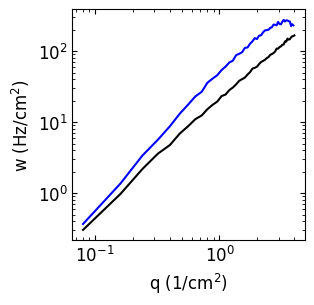

In [344]:
fig,ax=plt.subplots(figsize=(3,3))
fontsize=12
plt.plot(q_lst,w_lst,color='k')
plt.plot(dout['q'].values,dout['w'].values,color='b')
plt.xscale('log')
plt.yscale('log')
# plt.axis([5e-2,5e0,0.1,100])
plt.tick_params(top=True, right=True,direction='in',which='both')
format_plot(xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)
plt.show()

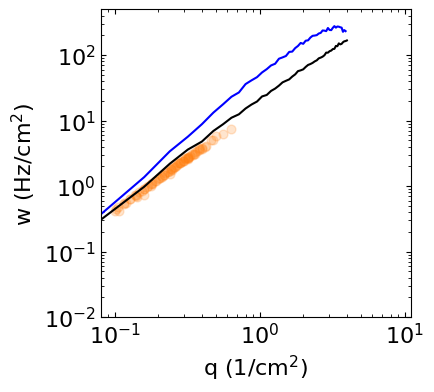

In [345]:
use_filterby_minN=True
minN=10
# minN=8
# figsize = (6, 4)  #(5,4)
figsize = (4, 4)  #(5,4)
fontsize=16

# x1lim=[0.008, 11]
x1lim=[0.08, 11]
# x2lim=[0.01, 250]
x2lim=[0.01, 500]


fig, ax = plt.subplots(figsize=figsize)
ax = plot_death_rates_loglog_full(fk,lr,ax=ax,fontsize=fontsize,x1lim=x1lim, x2lim=x2lim,
                                  show_fk=False,
                                 )
ax.plot(dout['q'].values,dout['w'].values,color='b')
ax.plot(q_lst,w_lst,color='k')
ax.set_xscale('log')
ax.set_yscale('log')
# AddLegend(ax=ax)
ax.get_legend().remove()
# ax.axis([5e-2,5e0,0.1,100])
ax.tick_params(top=True, right=True,direction='in',which='both')
format_plot(ax=ax,xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)
plt.show()

In [124]:
# Q: why don't they perfectly touch?
# A: because the first datum is removed.

<function lib.viewer.PlotFits.plot_death_rates_loglog_full(fk, lr, ax=None, x1lim=[0.008, 11], x2lim=[0.01, 250], legend_alpha=1.0, minx=0.1, alpha=0.2, s=40, fontsize=18, use_loglog=True, frameon_legend=False, show_fk=True, show_lr=True, zorder=0, **kwargs)>